# Web Scraping

* Extract information from a given web site
* Write the scraped data into a csv file.


In [1]:
#this url contains the data to be scraped
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html'

Scrape  **name of the programming language** and **average annual salary**.<br>

In [2]:
#Import the required libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd
import json

In [3]:
# Download the webpage at the url and check response (200-OK)
web = requests.get(url)
print(web)


<Response [200]>


In [4]:
#Create soup object

soup = BeautifulSoup(web.text, 'html')



In [5]:
#Scraping the `Language name` and `annual average salary`.

tabela = soup.find('table')

data = tabela.find_all('tr')

list=[i.text.split('\n') for i in tabela.find_all('tr')]

output=[]
for row in list:

  output.append([row[2],row[4]])

df=pd.DataFrame(output[1:],columns=['Language','Average Annual Salary'])
df['Average Annual Salary']=df['Average Annual Salary'].str.replace('$','')
df['Average Annual Salary']=df['Average Annual Salary'].str.replace(',','')
df['Average Annual Salary']=df['Average Annual Salary'].astype('float')
df=df.sort_values('Average Annual Salary', ascending=False)
df

,Language,Average Annual Salary
4,Swift,130801.0
0,Python,114383.0
5,C++,113865.0
3,Javascript,110981.0
1,Java,101013.0
9,Go,94082.0
2,R,92037.0
6,C#,88726.0
8,SQL,84793.0
7,PHP,84727.0


# Save the scrapped data into a file named *popular-languages.csv*


In [6]:
pd.DataFrame.to_excel(df,'popular languages.xlsx')
pd.DataFrame.to_csv(df,'popular languages.csv')

## Warm-Up Practice


Using an API, lets find out who currently are on the International Space Station (ISS).<br> The API at [http://api.open-notify.org/astros.json](http://api.open-notify.org/astros.json?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) gives us the information of astronauts currently on ISS in json format.<br>


In [7]:
import requests
import pandas as pd

In [8]:
api_url = "http://api.open-notify.org/astros.json"

In [9]:
response = requests.get(api_url)
response

<Response [200]>

In [10]:
data=response.json()
print(data)

{'people': [{'craft': 'ISS', 'name': 'Oleg Kononenko'}, {'craft': 'ISS', 'name': 'Nikolai Chub'}, {'craft': 'ISS', 'name': 'Tracy Caldwell Dyson'}, {'craft': 'ISS', 'name': 'Matthew Dominick'}, {'craft': 'ISS', 'name': 'Michael Barratt'}, {'craft': 'ISS', 'name': 'Jeanette Epps'}, {'craft': 'ISS', 'name': 'Alexander Grebenkin'}, {'craft': 'ISS', 'name': 'Butch Wilmore'}, {'craft': 'ISS', 'name': 'Sunita Williams'}, {'craft': 'Tiangong', 'name': 'Li Guangsu'}, {'craft': 'Tiangong', 'name': 'Li Cong'}, {'craft': 'Tiangong', 'name': 'Ye Guangfu'}], 'number': 12, 'message': 'success'}


In [11]:
data.keys()

dict_keys(['people', 'number', 'message'])

In [12]:
#number of astronauts on ISS
print(data['number'])

12


In [13]:
#number and names of the astronauts on ISS
for i in data['people']:
  print(f'{i["name"]} from {i["craft"]}')

Oleg Kononenko from ISS
Nikolai Chub from ISS
Tracy Caldwell Dyson from ISS
Matthew Dominick from ISS
Michael Barratt from ISS
Jeanette Epps from ISS
Alexander Grebenkin from ISS
Butch Wilmore from ISS
Sunita Williams from ISS
Li Guangsu from Tiangong
Li Cong from Tiangong
Ye Guangfu from Tiangong


## Lab: Collect Jobs Data using Jobs API


### Objective: Determine the number of jobs currently open for various technologies  and for various locations


Collect the number of job postings for the following locations using the API:

* Los Angeles
* New York
* San Francisco
* Washington DC
* Seattle
* Austin
* Detroit


In [14]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json'
response=requests.get(url)
data=response.json()
data[0:5]

[{'Id': 0,
  'Job Title': 'Digital Media Planner',
  'Job Experience Required': '5 - 10 yrs',
  'Key Skills': 'Media Planning| Digital Media',
  'Role Category': 'Advertising',
  'Location': 'Los Angeles',
  'Functional Area': 'Marketing , Advertising , MR , PR , Media Planning',
  'Industry': 'Advertising, PR, MR, Event Management',
  'Role': 'Media Planning Executive/Manager'},
 {'Id': 1,
  'Job Title': 'Online Bidding Executive',
  'Job Experience Required': '2 - 5 yrs',
  'Key Skills': 'pre sales| closing| software knowledge| clients| requirements| negotiating| client| online bidding| good communication| technology',
  'Role Category': 'Retail Sales',
  'Location': 'New York',
  'Functional Area': 'Sales , Retail , Business Development',
  'Industry': 'IT-Software, Software Services',
  'Role': 'Sales Executive/Officer'},
 {'Id': 2,
  'Job Title': 'Trainee Research/ Research Executive- Hi- Tech Operations',
  'Job Experience Required': '0 - 1 yrs',
  'Key Skills': 'Computer science

In [15]:
df=pd.DataFrame(data)
df.head()

,Id,Job Title,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,0,Digital Media Planner,5 - 10 yrs,Media Planning| Digital Media,Advertising,Los Angeles,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,1,Online Bidding Executive,2 - 5 yrs,pre sales| closing| software knowledge| client...,Retail Sales,New York,"Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,2,Trainee Research/ Research Executive- Hi- Tech...,0 - 1 yrs,Computer science| Fabrication| Quality check| ...,R&D,San Francisco,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,3,Technical Support,0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Washington DC,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,4,Software Test Engineer -hyderabad,2 - 5 yrs,manual testing| test engineering| test cases| ...,Programming & Design,Boston,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


Count number of jobs per location based on list below:

Los Angeles, New York, San Francisco, Washington DC, Seattle

In [16]:
list = ["Los Angeles", "New York", "San Francisco", "Washington DC", "Seattle", "Austin","Detroit"]


In [17]:
#function for calculating the number of jobs

def number_of_jobs_location(a):
  count = 0
  for i in range(0,len(data)):
    if a in data[i]['Location']:
      count=count+1
  return count

#testing the function
number_of_jobs_location('Boston')

2966

In [18]:
for i in list:
  print(f' {i} has {number_of_jobs_location(i)} job oportunies')

 Los Angeles has 640 job oportunies
 New York has 3226 job oportunies
 San Francisco has 435 job oportunies
 Washington DC has 5316 job oportunies
 Seattle has 3375 job oportunies
 Austin has 434 job oportunies
 Detroit has 3945 job oportunies


### Store the results in an excel file


In [19]:
import openpyxl
from openpyxl import Workbook
wb = openpyxl.Workbook()
sheet = wb.active


Find the number of jobs postings for each of the location in the above list.
Write the Location name and the number of jobs postings into the excel spreadsheet.


In [20]:
def jobs_location_wb(a):
  count = 0
  for i in range(0,len(data)):
    if a in data[i]['Location']:
      count=count+1
  return [a,count]

def location_workbook(L):
  sheet.append(['Location','count']) #ADICIONAR PRIMEIRA LINHA - CABEÇALHO
  for location in L:
    row=jobs_location_wb(location)
    sheet.append(row)

location_workbook(list)

In [21]:
# Save in excel file
wb.save("job postings.xlsx")

# **Stackover flow Developers Survey Dataset Exploration**


The dataset is available on the IBM Cloud at the below url.
The data uses part of Stackover flow complete data.

In [22]:
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv"

In [23]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv')
df.head()


,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


In [24]:
#number of rows and columns
df.shape

(11552, 85)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11552 entries, 0 to 11551
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              11552 non-null  int64  
 1   MainBranch              11552 non-null  object 
 2   Hobbyist                11552 non-null  object 
 3   OpenSourcer             11552 non-null  object 
 4   OpenSource              11471 non-null  object 
 5   Employment              11552 non-null  object 
 6   Country                 11552 non-null  object 
 7   Student                 11499 non-null  object 
 8   EdLevel                 11436 non-null  object 
 9   UndergradMajor          10812 non-null  object 
 10  EduOther                11388 non-null  object 
 11  OrgSize                 11454 non-null  object 
 12  DevType                 11485 non-null  object 
 13  YearsCode               11543 non-null  object 
 14  Age1stCode              11539 non-null

.

-   Identify duplicate values in the dataset.

-   Remove duplicate values from the dataset.

-   Identify missing values in the dataset.

-   Impute the missing values in the dataset.

-   Normalize data in the dataset.


<hr>


 Find how many duplicate rows exist in the dataframe.


In [26]:
#unique values per columns
df.nunique()

Respondent      11398
MainBranch          2
Hobbyist            2
OpenSourcer         4
OpenSource          3
                ...  
Sexuality           7
Ethnicity          89
Dependents          2
SurveyLength        3
SurveyEase          3
Length: 85, dtype: int64

In [27]:
#duplicated rows
df.duplicated().sum()



154

In [28]:
#Remove duplicates
df.drop_duplicates(inplace=True)



In [29]:
df.shape

(11398, 85)

Verify if duplicates were actually dropped.


In [30]:
df.duplicated().sum()



0

In [31]:
# Find missing values
df.isnull().sum()

Respondent        0
MainBranch        0
Hobbyist          0
OpenSourcer       0
OpenSource       81
               ... 
Sexuality       542
Ethnicity       675
Dependents      140
SurveyLength     19
SurveyEase       14
Length: 85, dtype: int64

In [32]:
df['EdLevel'].isnull().sum()

112

In [33]:
df['Country'].isnull().sum()

0

In [34]:
df['WorkLoc'].isnull().sum()


32

Fill null values for 'WorkLoc'

In [35]:
df['WorkLoc'].unique()


array(['Home', 'Office', 'Other place, such as a coworking space or cafe',
       nan], dtype=object)

In [36]:
df['WorkLoc'].describe()


count      11366
unique         3
top       Office
freq        6806
Name: WorkLoc, dtype: object

Impute (replace) all the empty rows in the column WorkLoc with the most frequent value

In [37]:
#replace nan with most frequent value ('Office')

import numpy as np

df['WorkLoc'].replace(np.nan, 'Office', inplace=True, regex=True)

In [38]:
df['WorkLoc'].isnull().sum()

0

# Normalizing data


There are two columns in the dataset that talk about compensation.

One is "CompFreq". This column shows how often a developer is paid (Yearly, Monthly, Weekly).

The other is "CompTotal". This column talks about how much the developer is paid per Year, Month, or Week depending upon his/her "CompFreq".

This makes it difficult to compare the total compensation of the developers.
The information should be standardized for annual compensation




<hr>


In [39]:
df[['CompFreq','CompTotal']].head()


,CompFreq,CompTotal
0,Yearly,61000.0
1,Yearly,138000.0
2,Yearly,90000.0
3,Monthly,29000.0
4,Yearly,90000.0


In [40]:
df['CompFreq'].unique()

array(['Yearly', 'Monthly', 'Weekly', nan], dtype=object)

In [41]:
#Create index column for normalization.
# Normalized Annual Compensation will be Compensation x Index

index=[]
for i in df['CompFreq']:
   if i =='Yearly':
       index.append(1)
   elif i =='Monthly':
       index.append(12)
   else:
       index.append(52)

df['Index']=index
df['NormalizedAnnualCompensation']=df['CompTotal']*df['Index']
df.head()


,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,Index,NormalizedAnnualCompensation
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy,1,61000.0
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,1,138000.0
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy,1,90000.0
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,12,348000.0
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy,1,90000.0


In [42]:
df[['CompTotal','CompFreq','Index','NormalizedAnnualCompensation']].head()

,CompTotal,CompFreq,Index,NormalizedAnnualCompensation
0,61000.0,Yearly,1,61000.0
1,138000.0,Yearly,1,138000.0
2,90000.0,Yearly,1,90000.0
3,29000.0,Monthly,12,348000.0
4,90000.0,Yearly,1,90000.0


In [43]:
df['NormalizedAnnualCompensation'].mean()

6170770.806686183

#**Visualizations**

#For the following analysis the info used will be Converted Comp as it standardize the compensation to US Dollars

In [ ]:
df['ConvertedComp'].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

.


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px



<Axes: xlabel='ConvertedComp', ylabel='Count'>

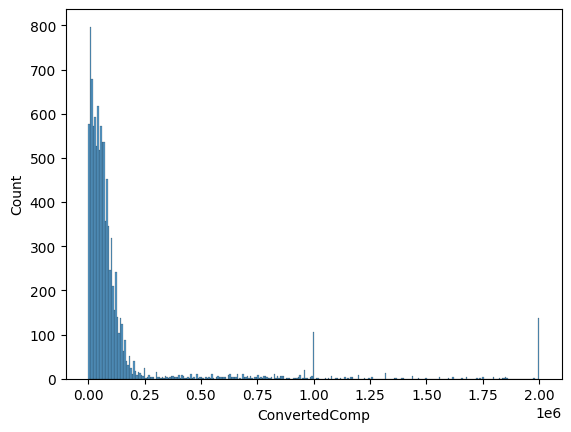

In [45]:
sns.histplot(data=df, x='ConvertedComp')



Histplot indicates presence of outliers


<Axes: ylabel='ConvertedComp'>

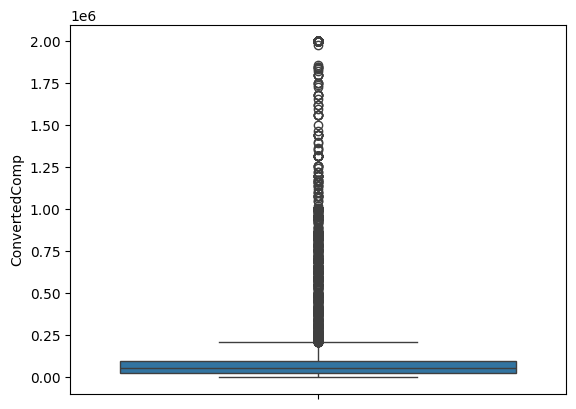

In [46]:
sns.boxplot(df,y='ConvertedComp')

In [47]:
df['ConvertedComp'].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [48]:
#Quartiles calculation for handling outliers

Q1=df['ConvertedComp'].quantile(0.25)
Q3=df['ConvertedComp'].quantile(0.75)
IQR = Q3-Q1
low_limit = Q1 - 1.5*IQR
high_limit = Q3  + 1.5*IQR

In [49]:
print(f'Q1 - {Q1}')
print(f'Q3 - {Q3}')
print(f'IQR - {IQR}')
print(f'low_limit - {low_limit}')
print(f'high_limit - {high_limit}')

Q1 - 26868.0
Q3 - 100000.0
IQR - 73132.0
low_limit - -82830.0
high_limit - 209698.0


In [50]:
#DataFrame with the ConvertedComp outliers rows (ConvertedComp Below Q1 - 1,5*IQR or Above Q3 + 1,5*IQF)

outliers = df[(df['ConvertedComp'] < Q1 - 1.5 * IQR) | (df['ConvertedComp'] > Q3 + 1.5 * IQR)]
outliers.shape[1]


87

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


<Axes: ylabel='ConvertedComp'>

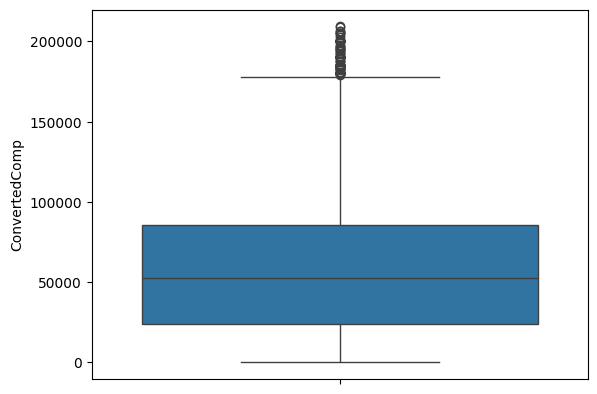

In [51]:
new_df = df.drop(index=outliers.index)
sns.boxplot(new_df['ConvertedComp'])



In [52]:
new_df['ConvertedComp'].describe()

count      9703.000000
mean      59883.208389
std       43394.336755
min           0.000000
25%       24060.000000
50%       52704.000000
75%       85574.500000
max      209356.000000
Name: ConvertedComp, dtype: float64

Outlier Analysis for Age

<Axes: ylabel='Age'>

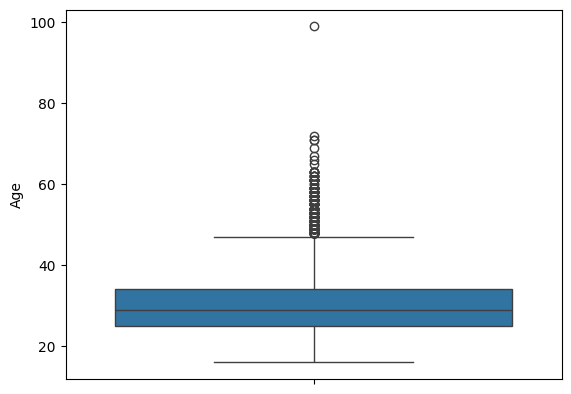

In [53]:
sns.boxplot(new_df['Age'])

<Axes: ylabel='Age'>

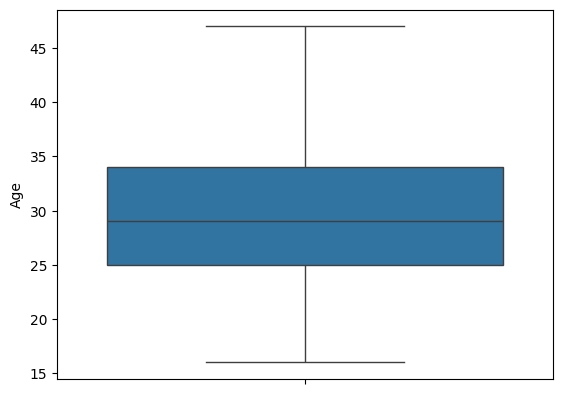

In [54]:
Q1a=new_df['Age'].quantile(0.25)
Q3a=new_df['Age'].quantile(0.75)
IQRa = Q3a-Q1a
low_limita = Q1a - 1.5*IQRa
high_limita = Q3a  + 1.5*IQRa

outliers_age = new_df[(new_df['Age'] < Q1a - 1.5 * IQRa) | (new_df['Age'] > Q3a + 1.5 * IQRa)]
outliers_age.shape[1]

data = new_df.drop(index=outliers_age.index)
sns.boxplot(data['Age'])
# your code goes here

Text(0.5, 1.0, 'Mean average by Gender')

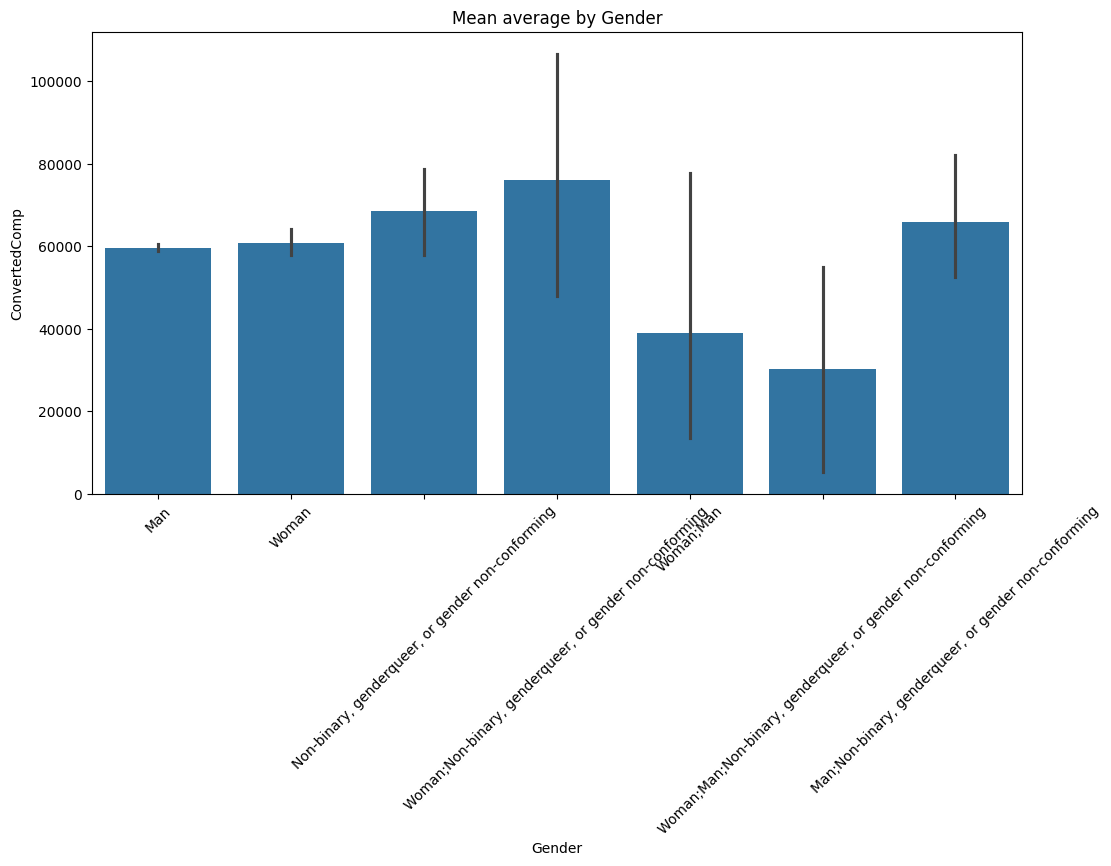

In [55]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.tick_params(axis='x', labelrotation=45)

sns.barplot(new_df, x='Gender', y='ConvertedComp', estimator='mean')

plt.title('Mean average by Gender')

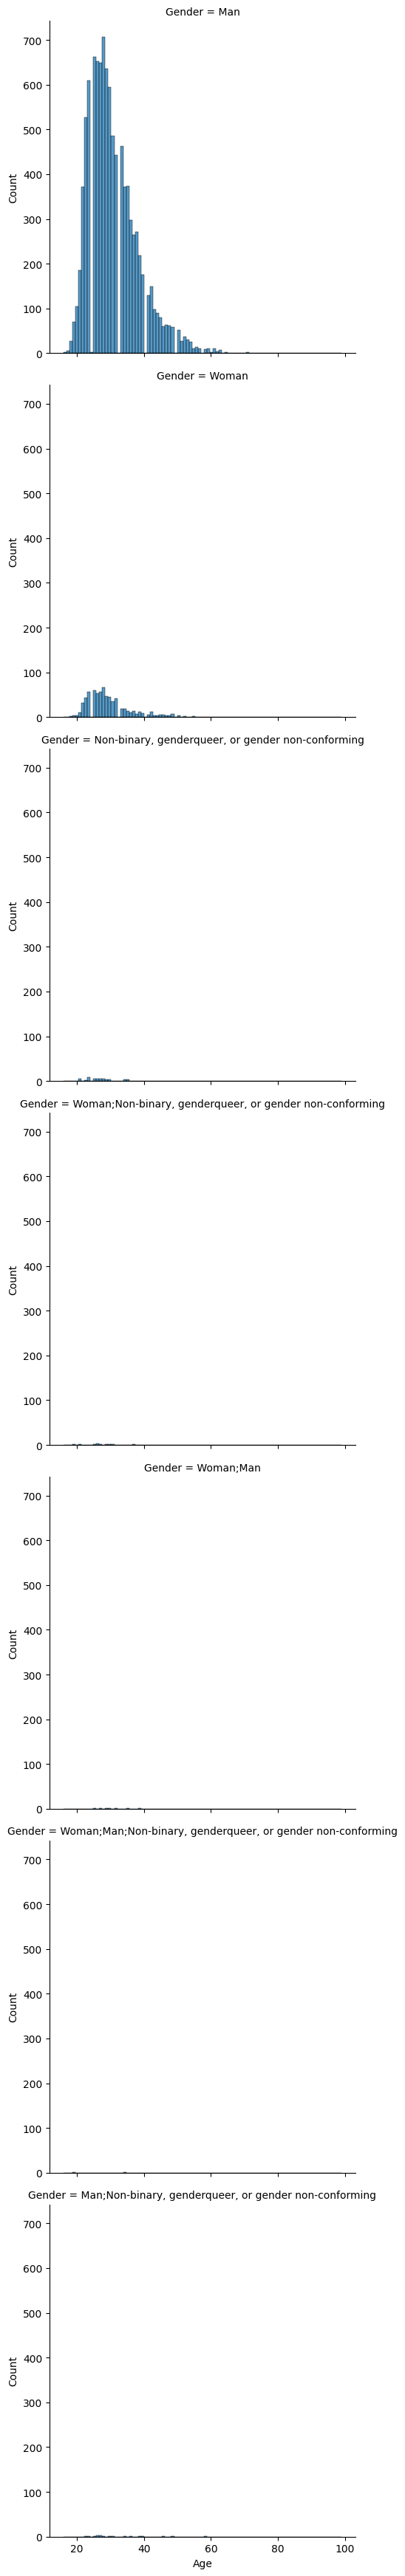

In [56]:
# Age histogtam for differents Genders
sns.displot(df, x='Age', row='Gender')

## Correlation


Find the correlation between `Age` and all other numerical columns.


In [ ]:
#Select columns with numerical datatypes
data.select_dtypes(include=['int64','float64']).columns

Index(['Respondent', 'CompTotal', 'ConvertedComp', 'WorkWeekHrs', 'CodeRevHrs',
       'Age', 'Index', 'NormalizedAnnualCompensation'],
      dtype='object')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11398 entries, 0 to 11551
Data columns (total 87 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    11398 non-null  int64  
 1   MainBranch                    11398 non-null  object 
 2   Hobbyist                      11398 non-null  object 
 3   OpenSourcer                   11398 non-null  object 
 4   OpenSource                    11317 non-null  object 
 5   Employment                    11398 non-null  object 
 6   Country                       11398 non-null  object 
 7   Student                       11347 non-null  object 
 8   EdLevel                       11286 non-null  object 
 9   UndergradMajor                10661 non-null  object 
 10  EduOther                      11234 non-null  object 
 11  OrgSize                       11302 non-null  object 
 12  DevType                       11333 non-null  object 
 13  YearsC

<Axes: >

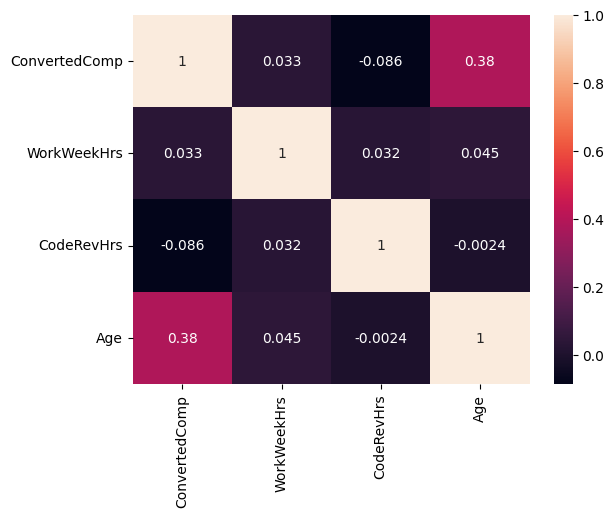

In [58]:
numeric_list=['ConvertedComp','WorkWeekHrs','CodeRevHrs', 'Age']
sns.heatmap(data[numeric_list].corr(), annot=True)



The highest correlation is Age vs ConvertedComp (Positive relation but not strong)

No correlation between WorkWeekHrs or CodeRevHrs vs Age